In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('Wine_grading.csv')

In [3]:
df

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

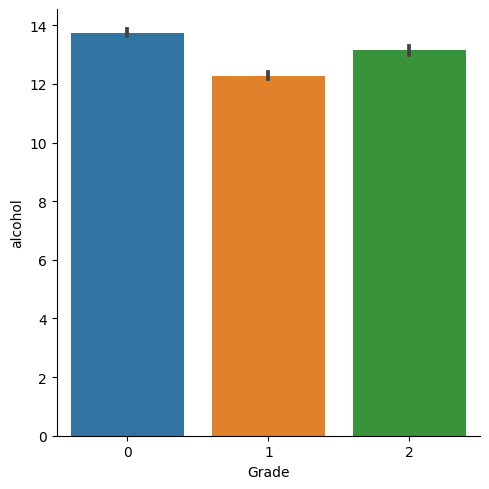

In [5]:
sns.catplot( x="Grade", y="alcohol", data=df, kind="bar")

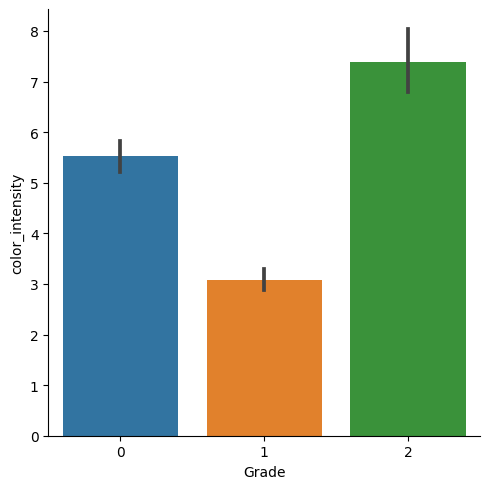

In [6]:
sns.catplot( x="Grade", y="color_intensity", data=df, kind="bar")

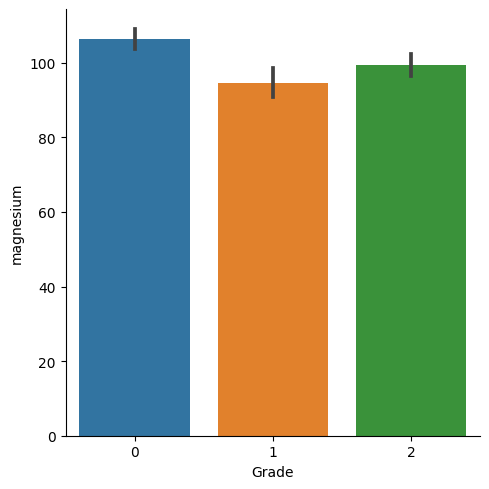

In [7]:
sns.catplot( x="Grade", y="magnesium", data=df, kind="bar")

In [8]:
df.describe(include="all")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [9]:
df.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
Grade                           False
dtype: bool

In [10]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [11]:
features_list = df.columns[:-1]
x = df[features_list]
y = df["Grade"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [13]:
print(x_train.head())
numeric_features = [i for i, item in enumerate(x_train.columns)] 
numeric_transformer = StandardScaler()

# categorical_features = [] 
# categorical_transformer = OneHotEncoder()


feature_encoder = ColumnTransformer(
    transformers=[
        # ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

x_train = feature_encoder.fit_transform(x_train)
(x_train[0:5,:])

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
161    13.69        3.26  2.54               20.0      107.0           1.83   
92     12.69        1.53  2.26               20.7       80.0           1.38   
94     11.62        1.99  2.28               18.0       98.0           3.02   
174    13.40        3.91  2.48               23.0      102.0           1.80   
24     13.50        1.81  2.61               20.0       96.0           2.53   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
161        0.56                  0.50             0.80             5.88  0.96   
92         1.46                  0.58             1.62             3.05  0.96   
94         2.26                  0.17             1.35             3.25  1.16   
174        0.75                  0.43             1.41             7.30  0.70   
24         2.61                  0.28             1.66             3.52  1.12   

     od280/od315_of_diluted_wines  pro

array([[ 0.87668336,  0.79842885,  0.64412971,  0.12974277,  0.48853231,
        -0.70326216, -1.42846826,  1.0724566 , -1.36820277,  0.35193216,
         0.0290166 , -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858,  0.33380024, -1.41302392,
        -1.44153145, -0.5029981 ,  1.70109989,  0.02366802, -0.84114577,
         0.0290166 , -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, -0.45327855, -0.14531976,
         1.24904997,  0.31964204, -1.52069698, -0.4346309 , -0.75682931,
         0.90197362,  0.51900537, -1.31256499],
       [ 0.51613387,  1.38326325,  0.42085937,  1.00427477,  0.13639227,
        -0.75248011, -1.23309123,  0.52239372, -0.33278669,  0.95057904,
        -1.10582753, -1.42518658,  0.02533424],
       [ 0.64046128, -0.50620174,  0.90461179,  0.12974277, -0.28617578,
         0.44515674,  0.67954711, -0.65631245,  0.09156415, -0.64300209,
         0.72738222,  1.7132947 ,  0.33916246]])

In [14]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
x_test = x_test.copy()
x_test = feature_encoder.transform(x_test)
print(x_test[:5])

[[ 0.93884707 -0.63216607 -0.4350103  -0.91969562  1.26324041  0.55999863
   0.97775416 -1.20637533  0.02366802  0.3392847  -0.1455748   0.85229541
   1.04940526]
 [-0.24226334  0.26757916  0.42085937  0.7127641   0.84067236 -1.27747161
  -0.60582812 -0.9706341  -0.5873972   2.42611713 -2.06608025 -1.55017035
  -0.86659858]
 [-0.76443848 -1.11802849 -0.76991583 -0.16176789 -0.92002786  2.03653722
   1.18341419 -1.36353615  0.44801887 -0.25093054  1.16386073  0.3940216
  -1.06480588]
 [ 0.71505773 -0.57818135  0.34643592  0.27549811  1.12238439  1.15061407
   0.85435814 -1.28495574  1.43251284  0.50791762  0.1163123   0.61621496
   1.24761256]
 [ 0.08098793  3.08378173 -0.881551    0.56700877 -0.99045587  0.5928106
   0.72067911 -0.49915163  0.68565534 -1.03085781 -0.97488398  0.71342456
  -1.19694407]]


In [16]:

y_test_pred = classifier.predict(x_test)
print(y_test_pred[:5])
      
print("Final accuracy score on Test set: ",classifier.score(x_test, y_test))

[0 2 1 0 1]
Final accuracy score on Test set:  0.9722222222222222


In [17]:
print("Train score: ", classifier.score(x_train, y_train))
print("Test score: ", classifier.score(x_test, y_test))

Train score:  1.0
Test score:  0.9722222222222222


c:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


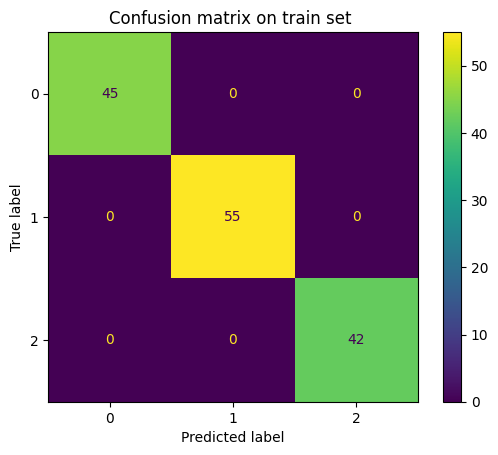

c:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy-score on train set :  1.0


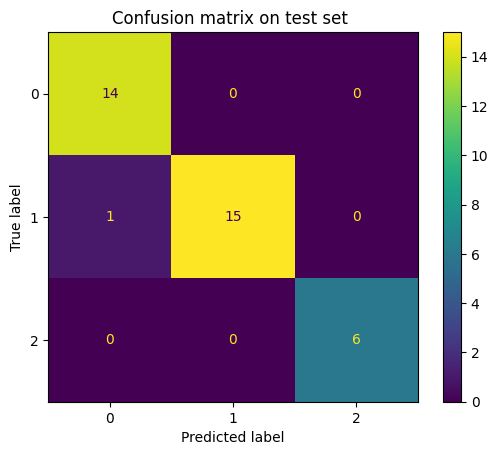

accuracy-score on test set :  0.9722222222222222


In [18]:
# Plot confusion matrix
cm = plot_confusion_matrix(classifier, x_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(x_train, y_train))


cm = plot_confusion_matrix(classifier, x_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(x_test, y_test))

Train model...
...Done.
Train score:  0.9225352112676056
Test score:  0.8888888888888888
--- Assessment of performances ---


c:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


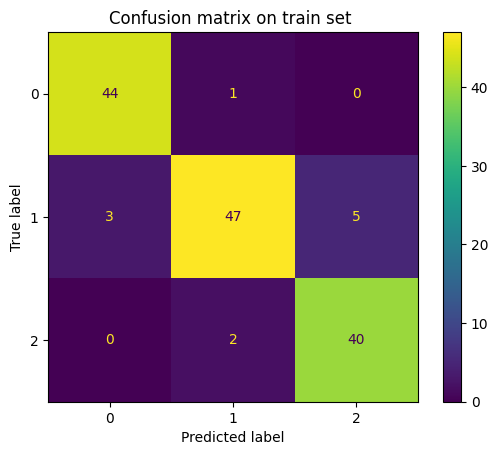

accuracy-score on train set :  0.9225352112676056


c:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


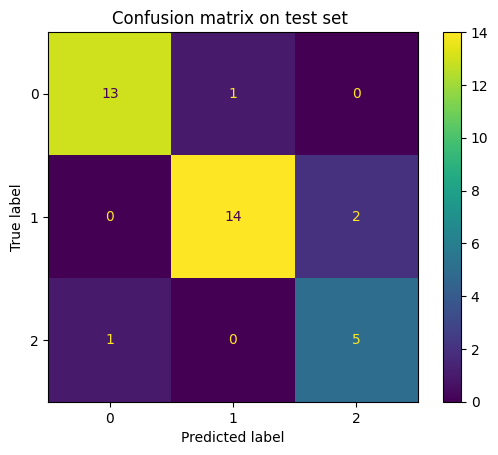

accuracy-score on test set :  0.8888888888888888


In [21]:
print("Train model...")
classifier = DecisionTreeClassifier(min_samples_split=80, class_weight="balanced" )
classifier.fit(x_train, y_train) # This steps is the actual training !
print("...Done.")


print("Train score: ", classifier.score(x_train, y_train))
print("Test score: ", classifier.score(x_test, y_test))

### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = plot_confusion_matrix(classifier, x_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(x_train, y_train))


cm = plot_confusion_matrix(classifier, x_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(x_test, y_test))

numerical columns are:  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

All column names are:  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')



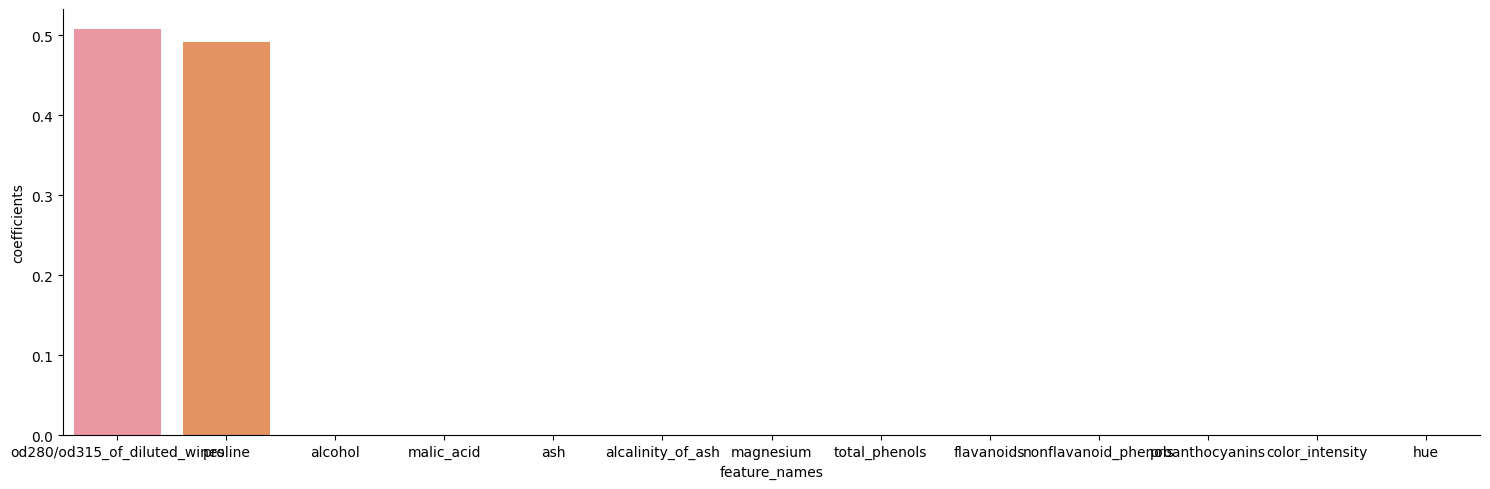

In [22]:
# Print numerical columns
numerical_column_names = x.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)
print()

# Append all columns 
all_column_names = numerical_column_names
print("All column names are: ",all_column_names)
print()

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":classifier.feature_importances_ # CAREFUL HERE. We need to access first index of our list because 
                                            # Data need to be 1 dimensional
                                            # That's what .squeeze()
})


# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=30/10) # Resize graph

Train model...
...Done.
Train score:  0.9436619718309859
Test score:  0.8055555555555556
--- Assessment of performances ---


c:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


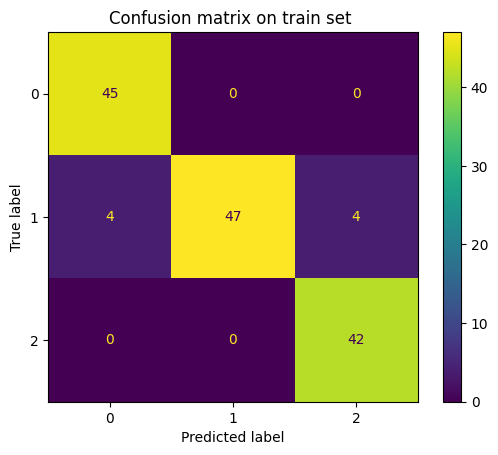

accuracy-score on train set :  0.9436619718309859


c:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


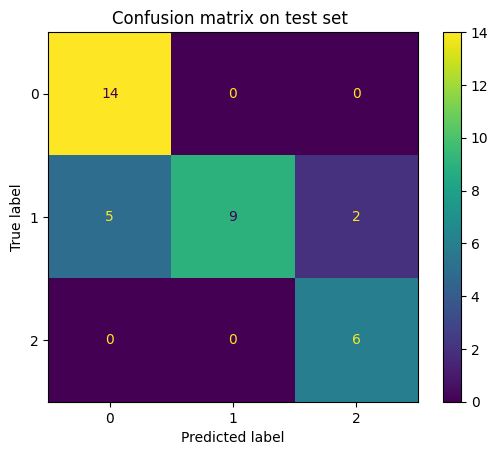

accuracy-score on test set :  0.8055555555555556


In [23]:
# Train model
print("Train model...")
classifier = RandomForestClassifier(min_samples_split=80, class_weight="balanced" )
classifier.fit(x_train, y_train) # This steps is the actual training !
print("...Done.")


print("Train score: ", classifier.score(x_train, y_train))
print("Test score: ", classifier.score(x_test, y_test))

### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = plot_confusion_matrix(classifier, x_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(x_train, y_train))


cm = plot_confusion_matrix(classifier, x_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(x_test, y_test))

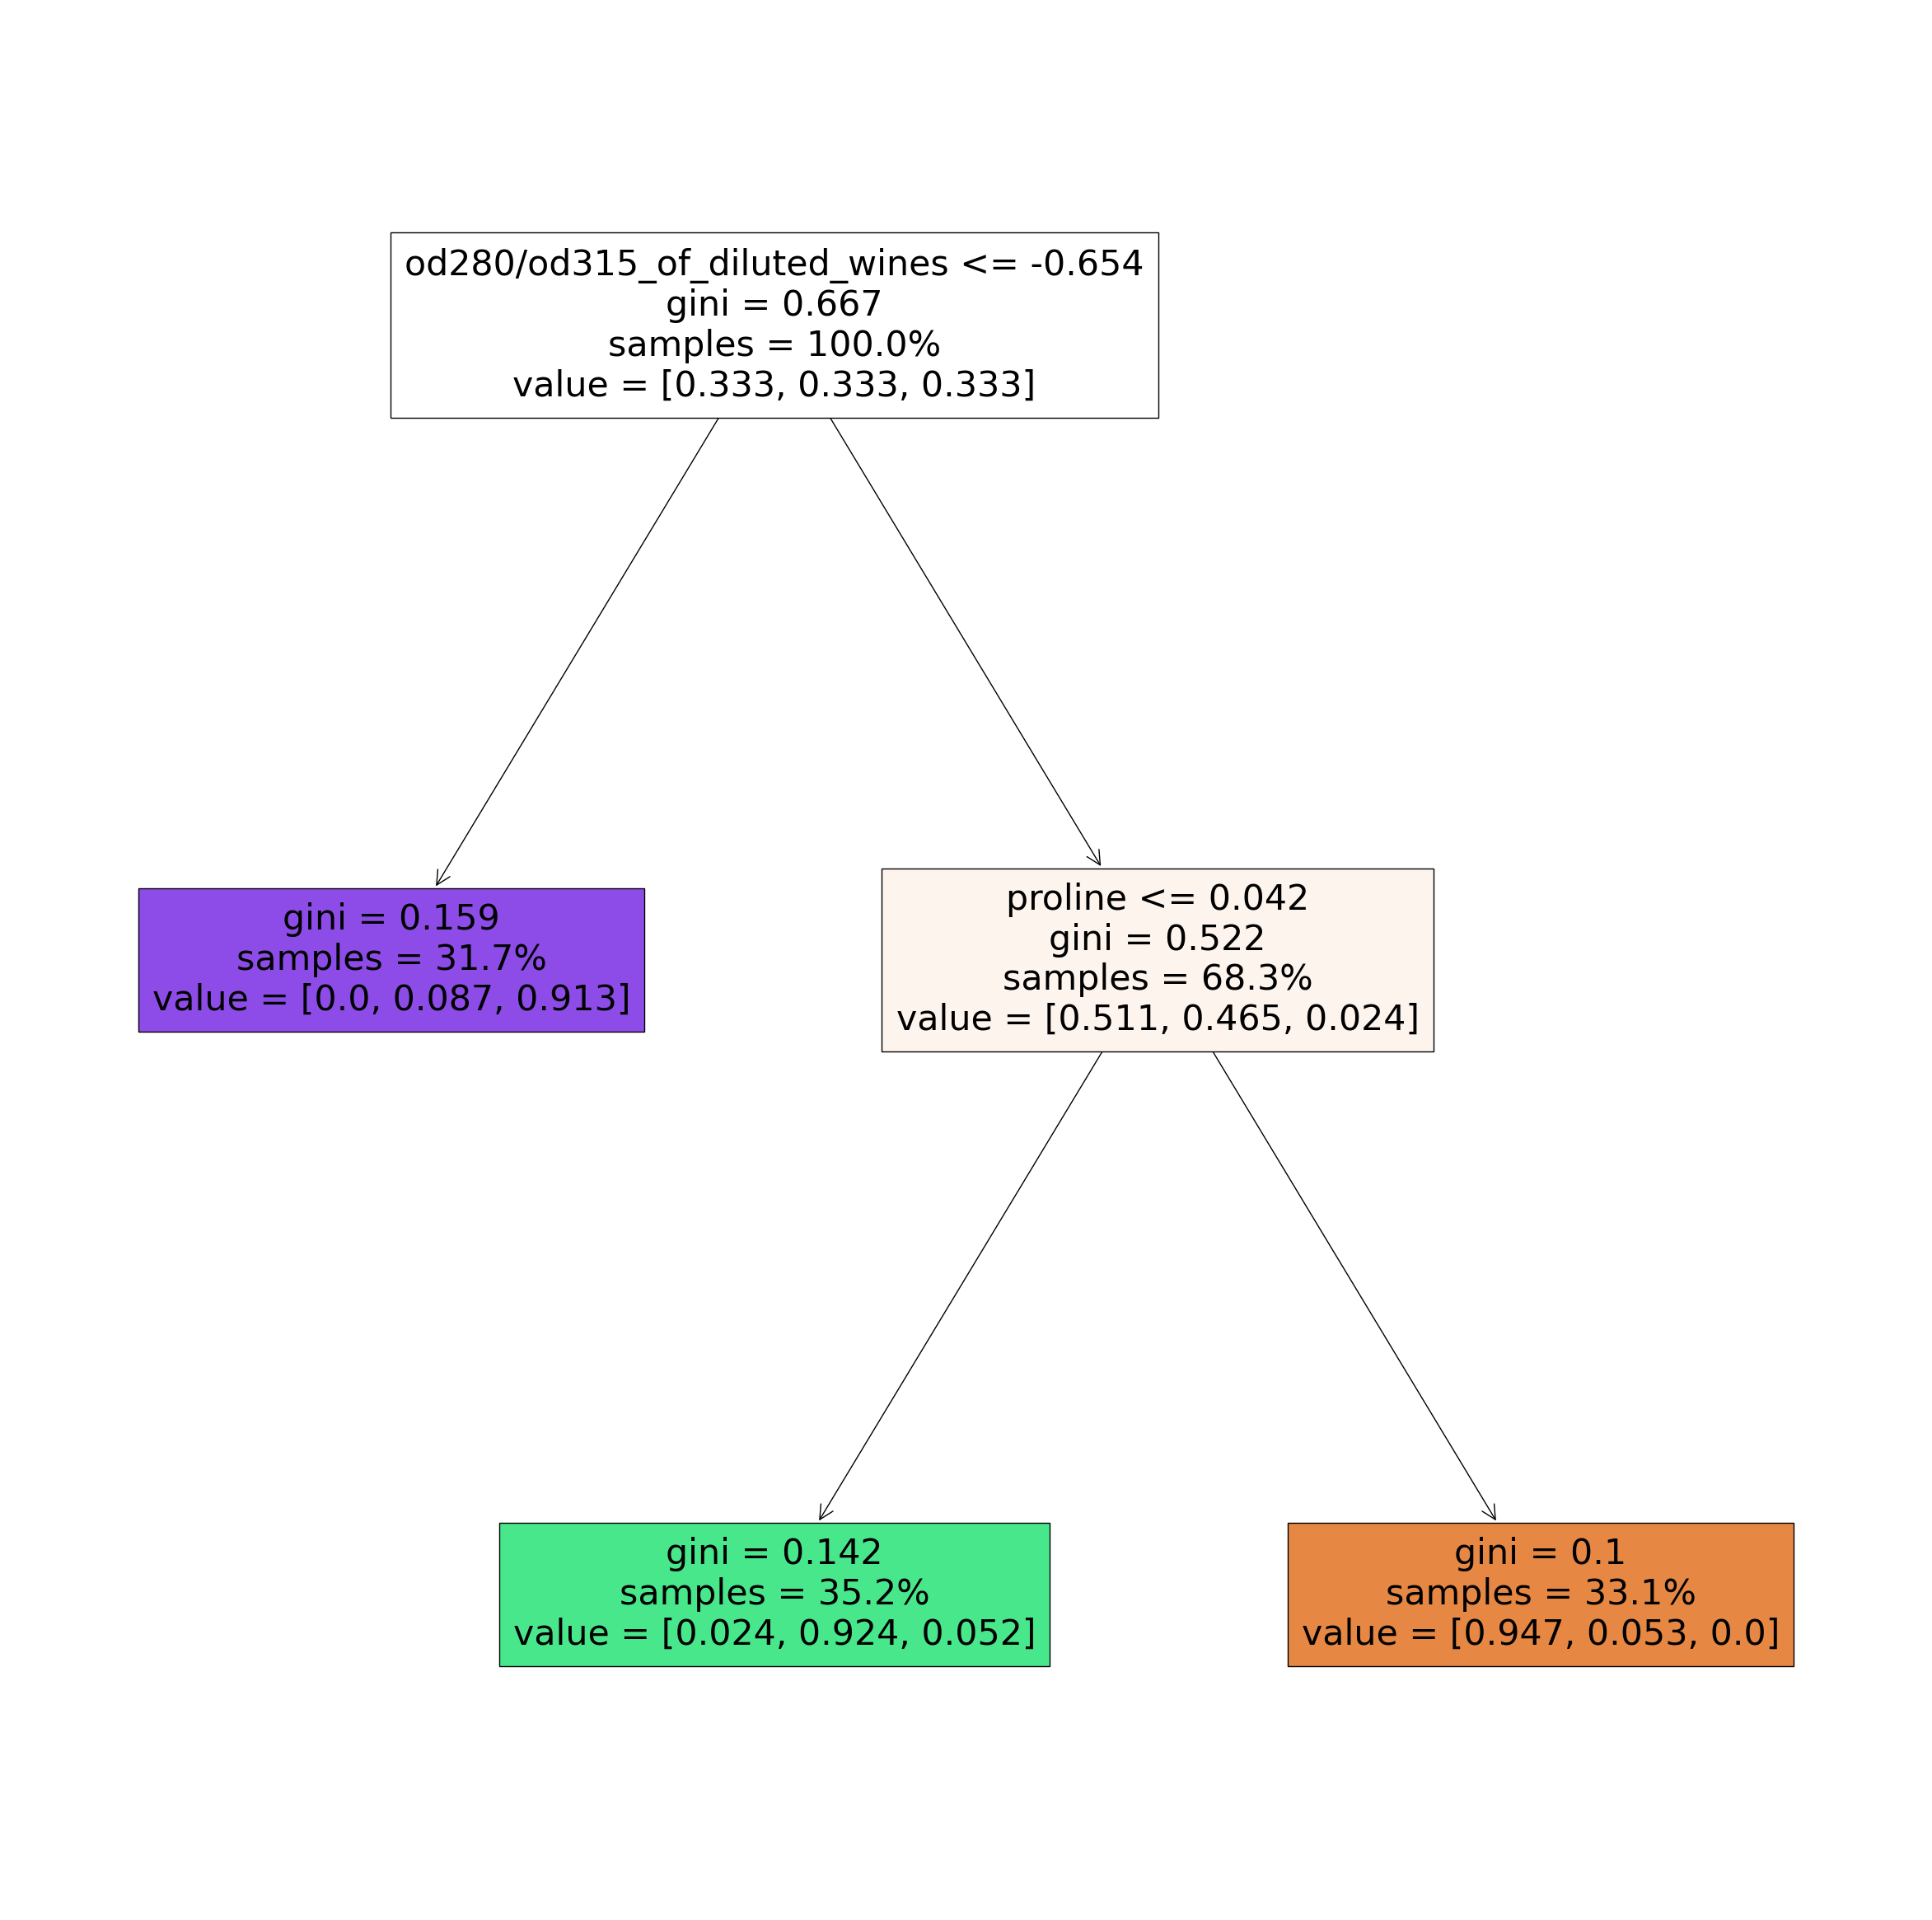

In [24]:
classifier = DecisionTreeClassifier(min_samples_split=80, class_weight="balanced" )
classifier.fit(x_train, y_train) # This steps is the actual training !


_, ax = plt.subplots(figsize=(30,30)) # Resize figure
plot_tree(classifier, filled=True, feature_names=all_column_names, proportion=True,ax=ax)
plt.show()